<a href="https://colab.research.google.com/github/5ASAKOV/pppo_clasification_project/blob/main/pppo_clasification_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/#4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/#4/train.csv
/content/drive/MyDrive/#4/test.csv
/content/drive/MyDrive/#4/sample_submission.csv
/content/drive/MyDrive/#4/images/1021.jpg
/content/drive/MyDrive/#4/images/907.jpg
/content/drive/MyDrive/#4/images/403.jpg
/content/drive/MyDrive/#4/images/1161.jpg
/content/drive/MyDrive/#4/images/1219.jpg
/content/drive/MyDrive/#4/images/886.jpg
/content/drive/MyDrive/#4/images/994.jpg
/content/drive/MyDrive/#4/images/66.jpg
/content/drive/MyDrive/#4/images/414.jpg
/content/drive/MyDrive/#4/images/665.jpg
/content/drive/MyDrive/#4/images/1094.jpg
/content/drive/MyDrive/#4/images/379.jpg
/content/drive/MyDrive/#4/images/191.jpg
/content/drive/MyDrive/#4/images/1153.jpg
/content/drive/MyDrive/#4/images/670.jpg
/content/drive/MyDrive/#4/images/880.jpg
/content/drive/MyDrive/#4/images/361.jpg
/content/drive/MyDrive/#4/images/372.jpg
/content/drive/MyDrive/#4/images/1252.jpg
/content/drive/MyDrive/#4/images/241.jpg
/content/drive/MyDrive/#4/images/454.jpg
/content/drive/

In [4]:
z_samp = "/content/drive/MyDrive/#4/sample_submission.csv"

In [5]:
z = "/content/drive/MyDrive/#4/train.csv"

In [6]:
z_img = "/content/drive/MyDrive/#4/images"

In [7]:
z_test = "/content/drive/MyDrive/#4/test.csv"

In [8]:
os.listdir()

['.config', 'drive', 'sample_data']

In [11]:
len(os.listdir(z_img))

1584

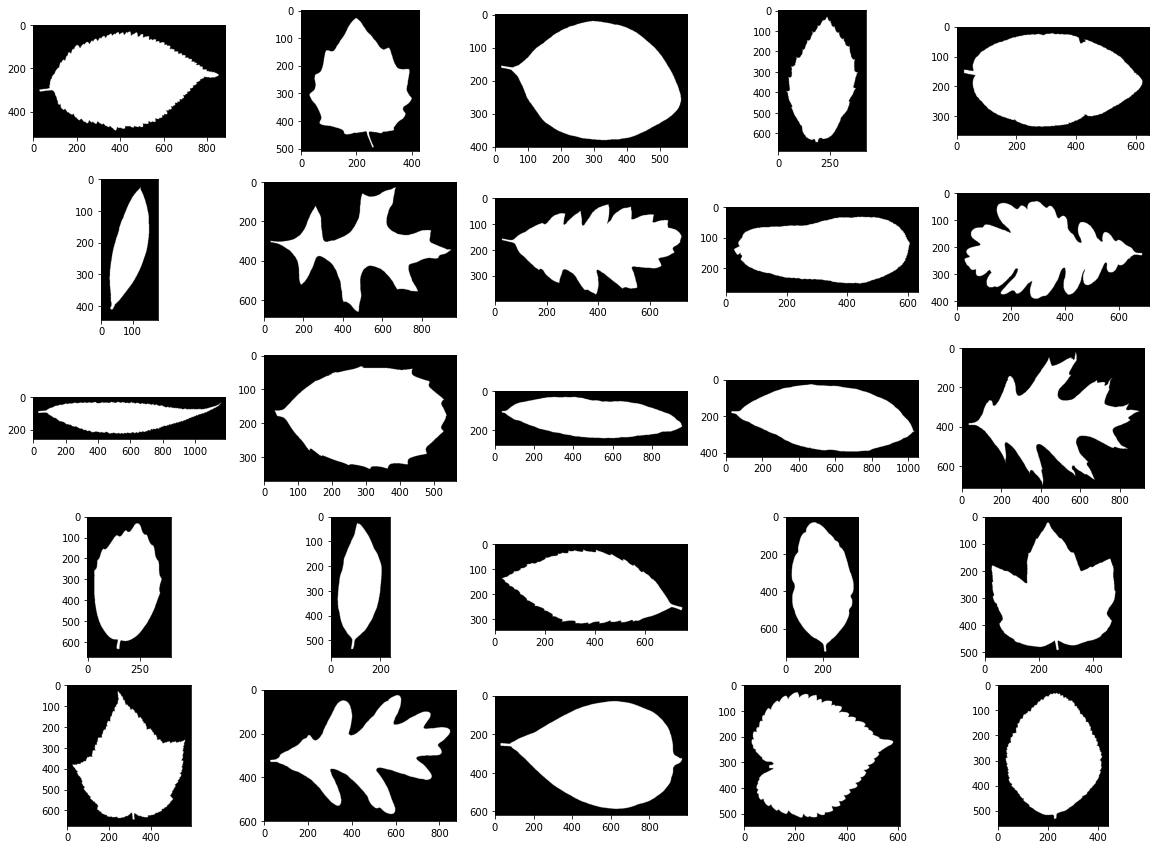

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir(z_img)))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/content/drive/MyDrive/#4/images',j))
    plt.imshow(img)

In [13]:
df=pd.read_csv('/content/drive/MyDrive/#4/train.csv',index_col=False)
dftest=pd.read_csv('/content/drive/MyDrive/#4/test.csv',index_col=False)

In [14]:
df.head()


id                species   margin1  ...  texture62  texture63  texture64
0   1            Acer_Opalus  0.007812  ...   0.004883   0.000000   0.025391
1   2  Pterocarya_Stenoptera  0.005859  ...   0.000977   0.039062   0.022461
2   3   Quercus_Hartwissiana  0.005859  ...   0.000000   0.020508   0.002930
3   5        Tilia_Tomentosa  0.000000  ...   0.017578   0.000000   0.047852
4   6     Quercus_Variabilis  0.005859  ...   0.000000   0.000000   0.031250

[5 rows x 194 columns]

In [15]:
dftest

id   margin1   margin2  ...  texture62  texture63  texture64
0       4  0.019531  0.009766  ...   0.000000   0.003906   0.053711
1       7  0.007812  0.005859  ...   0.000977   0.037109   0.044922
2       9  0.000000  0.000000  ...   0.015625   0.000000   0.000000
3      12  0.000000  0.000000  ...   0.089844   0.000000   0.008789
4      13  0.001953  0.000000  ...   0.007812   0.009766   0.007812
..    ...       ...       ...  ...        ...        ...        ...
589  1576  0.000000  0.000000  ...   0.018555   0.000000   0.000977
590  1577  0.000000  0.003906  ...   0.090820   0.000000   0.016602
591  1579  0.017578  0.029297  ...   0.000000   0.042969   0.006836
592  1580  0.013672  0.009766  ...   0.000000   0.011719   0.018555
593  1583  0.000000  0.117190  ...   0.015625   0.000000   0.017578

[594 rows x 193 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(df.species)
labels=le.transform(df.species)
classes=list(le.classes_)

In [17]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [18]:
df=df.drop(['id','species'],axis=1)
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

In [19]:
dftest

margin1   margin2   margin3  ...  texture62  texture63  texture64
0    0.019531  0.009766  0.078125  ...   0.000000   0.003906   0.053711
1    0.007812  0.005859  0.064453  ...   0.000977   0.037109   0.044922
2    0.000000  0.000000  0.001953  ...   0.015625   0.000000   0.000000
3    0.000000  0.000000  0.009766  ...   0.089844   0.000000   0.008789
4    0.001953  0.000000  0.015625  ...   0.007812   0.009766   0.007812
..        ...       ...       ...  ...        ...        ...        ...
589  0.000000  0.000000  0.003906  ...   0.018555   0.000000   0.000977
590  0.000000  0.003906  0.003906  ...   0.090820   0.000000   0.016602
591  0.017578  0.029297  0.015625  ...   0.000000   0.042969   0.006836
592  0.013672  0.009766  0.060547  ...   0.000000   0.011719   0.018555
593  0.000000  0.117190  0.000000  ...   0.015625   0.000000   0.017578

[594 rows x 192 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [21]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model = make_pipeline(StandardScaler(), SGDClassifier())

print(model.fit(X_train,y_train))

print(model.score(X_test,y_test))


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)
0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [27]:
models = pd.DataFrame({
    'Model': ['SGDClassifier'],

    'Score': [model.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

Model      Score
0  SGDClassifier  98.484848

In [28]:
test_pred = model.predict(dftest)

In [31]:
print(test_pred)
#u odnosu na model koji smo trenirali, prikazani su ID slika koje su najslicnije modelu

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 34 60 17 75 27 51 31 39 23 23  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 73 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 69 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 69 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [33]:
sample_df=pd.read_csv('/content/drive/MyDrive/#4/sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  ...  Viburnum_x_Rhytidophylloides  Zelkova_Serrata
0       4         0.010101  ...                      0.010101         0.010101
1       7         0.010101  ...                      0.010101         0.010101
2       9         0.010101  ...                      0.010101         0.010101
3      12         0.010101  ...                      0.010101         0.010101
4      13         0.010101  ...                      0.010101         0.010101
..    ...              ...  ...                           ...              ...
589  1576         0.010101  ...                      0.010101         0.010101
590  1577         0.010101  ...                      0.010101         0.010101
591  1579         0.010101  ...                      0.010101         0.010101
592  1580         0.010101  ...                      0.010101         0.010101
593  1583         0.010101  ...                      0.010101         0.010101

[594 rows x 100 columns]


In [35]:
output = pd.DataFrame({'Id': test_id,
                       
                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

#izbaci ID lista i prediktivni ID slike s kojim se najvise poklapa

Id  Labels
0   4      51
1   7      50
2   9       1
3  12      19
4  13      14

In [37]:
final=pd.concat([output,sample_df],axis=1)
final.head()

#spajamo sve podatke da nam tacno ispise

Id  Labels  ...  Viburnum_x_Rhytidophylloides  Zelkova_Serrata
0   4      51  ...                      0.010101         0.010101
1   7      50  ...                      0.010101         0.010101
2   9       1  ...                      0.010101         0.010101
3  12      19  ...                      0.010101         0.010101
4  13      14  ...                      0.010101         0.010101

[5 rows x 102 columns]